# 0) Building TF using tides 

## a) Load data

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import time


import importlib
from data import data_management
importlib.reload(data_management)

#%% TODO: MFI IS DROPPING ROWS!!
config = {"general":{"db_update": True,
                     "db_path": "D:/OneDrive/database/",
                     "output": "telegram/"},
          "strategy": {"instruments":[
                                      "ftx_BTC-PERP",
                                      "ftx_ETH/USD",
                                      "ftx_ETH-PERP",
                                      # "ftx_SOL/USD",
                                      # "ftx_XRP/USD",
                                      # "ftx_FTM/USD",
                                      # "ftx_TSM/USD",
                                      # "ftx_NVDA/USD",
                                      # "ftx_AMD/USD",
                                      "ftx_SPY/USD",
                                      "ftx_BITO/USD", 
                                      "ftx_BITW/USD",
                                      "ftx_GBTC/USD",
                                      "ftx_USO/USD",
                                      ],
                       "timeframes": ["5m"],
                       "indicators": {#'ema': {'length': [5,8,13,21,34,55], 'price': ['close']}, 
                                       'mfi': {'length': [8,13,21,34,55]},#,'preprocess':True, 'ohlc':4},
                                      # 'rsi': {'length': [3,5,8,13,21,34,55], 'price':['low', 'high']},
                                      # 'tide_fast': {'window': [12,24,36], "sensitivity": [10], "thresholds": [20], 'price':['open','high','low']},
                                      # 'tide_slow': {'window': [12,24,36], "sensitivity": [90], "thresholds": [20],'price':['open','high','low']},                                      
                                      # 'slopes': {'slope_lengths':[7,10,14,20,28,40,56,80],
                                      #           'scaling_factor':[1],
                                      #           'lookback':[500],
                                      #            'logRet_norm_window':[10],
                                      #           'upper_quantile':[0.9]}
                                      },
                       "resample": True
                      },

          }



data_manager = data_management.DataManager(instruments = config["strategy"]["instruments"],
                           db_path = config["general"]["db_path"],
                           update_db = config["general"]["db_update"],
                           timeframes = config["strategy"]["timeframes"],
                           indicators = config["strategy"]["indicators"],
                           resample = config["strategy"]["resample"],
                           )

klines_indicators_dict =  data_manager.load_data()
klines_dict = data_manager.klines_dict

print(f"\nPRE-PROCESSED\n")
for instrument,klines_instrument_dict in klines_dict.items():
    print(f"{instrument}")
    for timeframe, klines in klines_instrument_dict.items():
        print(f"{timeframe}: {klines.index[0]} ----> {klines.index[-1]}, len: {len(klines)}")
    
print(f"\nPOST-PROCESSED\n")
for instrument,df in klines_indicators_dict.items():
    print(f"{instrument}: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
    
df0 = klines_indicators_dict[config["strategy"]["instruments"][0]].copy()
# klines =  klines_dict[config["strategy"]["instruments"][0]]["1h"].copy()

[X] Strategy requires the following argument(s):
 - ta. Format is a list of dicts. Example: [{'kind': 'sma', 'length': 10}]
       Check the indicator for the correct arguments if you receive this error.


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

ftx_BTC-PERP_5m is outdated in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
BTC-PERP fetched: 2022-08-31T22:45:00.000Z to 2022-09-06T03:40:00.000Z
---> 1500 | 2022-09-06T03:40:00.000Z to 2022-08-31T22:45:00.000Z
BTC-PERP fetched: 2022-08-26T17:45:00.000Z to 2022-08-31T22:40:00.000Z
---> 3000 | 2022-08-31T22:40:00.000Z to 2022-08-31T22:45:00.000Z
BTC-PERP fetched: 2022-08-21T12:45:00.000Z to 2022-08-26T17:40:00.000Z
---> 4500 | 2022-08-26T17:40:00.000Z to 2022-08-31T22:45:00.000Z
save_to_db: ftx_BTC-PERP_5m ... 
returning ftx_BTC-PERP_5m ... 


 12%|██████████▌                                                                         | 1/8 [00:15<01:46, 15.15s/it]

ftx_ETH/USD_5m does not exist in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
ETH/USD fetched: 2022-08-31T22:45:00.000Z to 2022-09-06T03:40:00.000Z
---> 1500 | 2022-09-06T03:40:00.000Z to 2022-08-31T22:45:00.000Z
ETH/USD fetched: 2022-08-26T17:45:00.000Z to 2022-08-31T22:40:00.000Z
---> 3000 | 2022-08-31T22:40:00.000Z to 2022-08-31T22:45:00.000Z
ETH/USD fetched: 2022-08-21T12:45:00.000Z to 2022-08-26T17:40:00.000Z
---> 4500 | 2022-08-26T17:40:00.000Z to 2022-08-31T22:45:00.000Z
ETH/USD fetched: 2022-08-16T07:45:00.000Z to 2022-08-21T12:40:00.000Z
---> 6000 | 2022-08-21T12:40:00.000Z to 2022-08-31T22:45:00.000Z
ETH/USD fetched: 2022-08-11T02:45:00.000Z to 2022-08-16T07:40:00.000Z
---> 7500 | 2022-08-16T07:40:00.000Z to 2022-08-31T22:45:00.000Z
ETH/USD fetched: 2022-08-05T21:45:00.000Z to 2022-08-11T02:40:00.000Z
---> 9000 | 2022-08-11T02:40:00.000Z to 2022-08-31T22:45:00.000Z
ETH/USD fetched: 2022-07-31T16:45:00.000Z to 2022-08-05T21:40:00.000Z
---> 10500 |

 25%|████████████████████▊                                                              | 2/8 [12:53<45:14, 452.50s/it]

ftx_ETH-PERP_5m does not exist in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
ETH-PERP fetched: 2022-08-31T22:55:00.000Z to 2022-09-06T03:50:00.000Z
---> 1500 | 2022-09-06T03:50:00.000Z to 2022-08-31T22:55:00.000Z
ETH-PERP fetched: 2022-08-26T17:55:00.000Z to 2022-08-31T22:50:00.000Z
---> 3000 | 2022-08-31T22:50:00.000Z to 2022-08-31T22:55:00.000Z
ETH-PERP fetched: 2022-08-21T12:55:00.000Z to 2022-08-26T17:50:00.000Z
---> 4500 | 2022-08-26T17:50:00.000Z to 2022-08-31T22:55:00.000Z
ETH-PERP fetched: 2022-08-16T07:55:00.000Z to 2022-08-21T12:50:00.000Z
---> 6000 | 2022-08-21T12:50:00.000Z to 2022-08-31T22:55:00.000Z
ETH-PERP fetched: 2022-08-11T02:55:00.000Z to 2022-08-16T07:50:00.000Z
---> 7500 | 2022-08-16T07:50:00.000Z to 2022-08-31T22:55:00.000Z
ETH-PERP fetched: 2022-08-05T21:55:00.000Z to 2022-08-11T02:50:00.000Z
---> 9000 | 2022-08-11T02:50:00.000Z to 2022-08-31T22:55:00.000Z
ETH-PERP fetched: 2022-07-31T16:55:00.000Z to 2022-08-05T21:50:00.000Z
--->

 38%|███████████████████████████████▏                                                   | 3/8 [26:07<50:42, 608.52s/it]

ftx_SPY/USD_5m is outdated in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
SPY/USD fetched: 2022-08-31T23:10:00.000Z to 2022-09-06T04:05:00.000Z
---> 1500 | 2022-09-06T04:05:00.000Z to 2022-08-31T23:10:00.000Z
SPY/USD fetched: 2022-08-26T18:10:00.000Z to 2022-08-31T23:05:00.000Z
---> 3000 | 2022-08-31T23:05:00.000Z to 2022-08-31T23:10:00.000Z
SPY/USD fetched: 2022-08-21T13:10:00.000Z to 2022-08-26T18:05:00.000Z
---> 4500 | 2022-08-26T18:05:00.000Z to 2022-08-31T23:10:00.000Z
save_to_db: ftx_SPY/USD_5m ... 
returning ftx_SPY/USD_5m ... 


 50%|█████████████████████████████████████████▌                                         | 4/8 [26:22<24:56, 374.15s/it]

ftx_BITO/USD_5m does not exist in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
BITO/USD fetched: 2022-08-31T23:10:00.000Z to 2022-09-06T04:05:00.000Z
---> 1500 | 2022-09-06T04:05:00.000Z to 2022-08-31T23:10:00.000Z
BITO/USD fetched: 2022-08-26T18:10:00.000Z to 2022-08-31T23:05:00.000Z
---> 3000 | 2022-08-31T23:05:00.000Z to 2022-08-31T23:10:00.000Z
BITO/USD fetched: 2022-08-21T13:10:00.000Z to 2022-08-26T18:05:00.000Z
---> 4500 | 2022-08-26T18:05:00.000Z to 2022-08-31T23:10:00.000Z
BITO/USD fetched: 2022-08-16T08:10:00.000Z to 2022-08-21T13:05:00.000Z
---> 6000 | 2022-08-21T13:05:00.000Z to 2022-08-31T23:10:00.000Z
BITO/USD fetched: 2022-08-11T03:10:00.000Z to 2022-08-16T08:05:00.000Z
---> 7500 | 2022-08-16T08:05:00.000Z to 2022-08-31T23:10:00.000Z
BITO/USD fetched: 2022-08-05T22:10:00.000Z to 2022-08-11T03:05:00.000Z
---> 9000 | 2022-08-11T03:05:00.000Z to 2022-08-31T23:10:00.000Z
BITO/USD fetched: 2022-07-31T17:10:00.000Z to 2022-08-05T22:05:00.000Z
--->

 62%|███████████████████████████████████████████████████▉                               | 5/8 [30:03<15:56, 318.82s/it]

ftx_BITW/USD_5m does not exist in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
BITW/USD fetched: 2022-08-31T23:15:00.000Z to 2022-09-06T04:10:00.000Z
---> 1500 | 2022-09-06T04:10:00.000Z to 2022-08-31T23:15:00.000Z
BITW/USD fetched: 2022-08-26T18:15:00.000Z to 2022-08-31T23:10:00.000Z
---> 3000 | 2022-08-31T23:10:00.000Z to 2022-08-31T23:15:00.000Z
BITW/USD fetched: 2022-08-21T13:15:00.000Z to 2022-08-26T18:10:00.000Z
---> 4500 | 2022-08-26T18:10:00.000Z to 2022-08-31T23:15:00.000Z
BITW/USD fetched: 2022-08-16T08:15:00.000Z to 2022-08-21T13:10:00.000Z
---> 6000 | 2022-08-21T13:10:00.000Z to 2022-08-31T23:15:00.000Z
BITW/USD fetched: 2022-08-11T03:15:00.000Z to 2022-08-16T08:10:00.000Z
---> 7500 | 2022-08-16T08:10:00.000Z to 2022-08-31T23:15:00.000Z
BITW/USD fetched: 2022-08-05T22:15:00.000Z to 2022-08-11T03:10:00.000Z
---> 9000 | 2022-08-11T03:10:00.000Z to 2022-08-31T23:15:00.000Z
BITW/USD fetched: 2022-07-31T17:15:00.000Z to 2022-08-05T22:10:00.000Z
--->

 75%|██████████████████████████████████████████████████████████████▎                    | 6/8 [36:52<11:39, 349.61s/it]

ftx_GBTC/USD_5m does not exist in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
GBTC/USD fetched: 2022-08-31T23:20:00.000Z to 2022-09-06T04:15:00.000Z
---> 1500 | 2022-09-06T04:15:00.000Z to 2022-08-31T23:20:00.000Z
GBTC/USD fetched: 2022-08-26T18:20:00.000Z to 2022-08-31T23:15:00.000Z
---> 3000 | 2022-08-31T23:15:00.000Z to 2022-08-31T23:20:00.000Z
GBTC/USD fetched: 2022-08-21T13:20:00.000Z to 2022-08-26T18:15:00.000Z
---> 4500 | 2022-08-26T18:15:00.000Z to 2022-08-31T23:20:00.000Z
GBTC/USD fetched: 2022-08-16T08:20:00.000Z to 2022-08-21T13:15:00.000Z
---> 6000 | 2022-08-21T13:15:00.000Z to 2022-08-31T23:20:00.000Z
GBTC/USD fetched: 2022-08-11T03:20:00.000Z to 2022-08-16T08:15:00.000Z
---> 7500 | 2022-08-16T08:15:00.000Z to 2022-08-31T23:20:00.000Z
GBTC/USD fetched: 2022-08-05T22:20:00.000Z to 2022-08-11T03:15:00.000Z
---> 9000 | 2022-08-11T03:15:00.000Z to 2022-08-31T23:20:00.000Z
GBTC/USD fetched: 2022-07-31T17:20:00.000Z to 2022-08-05T22:15:00.000Z
--->

 88%|████████████████████████████████████████████████████████████████████████▋          | 7/8 [43:46<06:10, 370.58s/it]

ftx_USO/USD_5m does not exist in D:/OneDrive/database/ftx_klines.db
INTIATING PAGINATED REST API CALLS ... 
USO/USD fetched: 2022-08-31T23:30:00.000Z to 2022-09-06T04:25:00.000Z
---> 1500 | 2022-09-06T04:25:00.000Z to 2022-08-31T23:30:00.000Z
USO/USD fetched: 2022-08-26T18:30:00.000Z to 2022-08-31T23:25:00.000Z
---> 3000 | 2022-08-31T23:25:00.000Z to 2022-08-31T23:30:00.000Z
USO/USD fetched: 2022-08-21T13:30:00.000Z to 2022-08-26T18:25:00.000Z
---> 4500 | 2022-08-26T18:25:00.000Z to 2022-08-31T23:30:00.000Z
USO/USD fetched: 2022-08-16T08:30:00.000Z to 2022-08-21T13:25:00.000Z
---> 6000 | 2022-08-21T13:25:00.000Z to 2022-08-31T23:30:00.000Z
USO/USD fetched: 2022-08-11T03:30:00.000Z to 2022-08-16T08:25:00.000Z
---> 7500 | 2022-08-16T08:25:00.000Z to 2022-08-31T23:30:00.000Z
USO/USD fetched: 2022-08-05T22:30:00.000Z to 2022-08-11T03:25:00.000Z
---> 9000 | 2022-08-11T03:25:00.000Z to 2022-08-31T23:30:00.000Z
USO/USD fetched: 2022-07-31T17:30:00.000Z to 2022-08-05T22:25:00.000Z
---> 10500 |

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.71it/s]


PRE-PROCESSED

ftx_BTC-PERP
5m: 2019-07-20 12:35:00 ----> 2022-09-06 03:40:00, len: 329297
ftx_ETH/USD
5m: 2019-09-14 21:05:00 ----> 2022-09-06 03:40:00, len: 313096
ftx_ETH-PERP
5m: 2019-07-20 12:35:00 ----> 2022-09-06 03:50:00, len: 329317
ftx_SPY/USD
5m: 2020-11-02 14:10:00 ----> 2022-09-06 04:05:00, len: 193692
ftx_BITO/USD
5m: 2021-10-22 13:40:00 ----> 2022-09-06 04:05:00, len: 91749
ftx_BITW/USD
5m: 2021-01-05 05:00:00 ----> 2022-09-06 04:10:00, len: 175198
ftx_GBTC/USD
5m: 2021-01-05 05:00:00 ----> 2022-09-06 04:15:00, len: 175371
ftx_USO/USD
5m: 2021-01-19 11:15:00 ----> 2022-09-06 04:25:00, len: 171264

POST-PROCESSED

ftx_BTC-PERP: 2019-07-20 17:10:00 ----> 2022-09-06 03:40:00, len: 329140
ftx_ETH/USD: 2019-09-16 04:35:00 ----> 2022-09-06 03:40:00, len: 296267
ftx_ETH-PERP: 2019-07-20 17:10:00 ----> 2022-09-06 03:50:00, len: 325968
ftx_SPY/USD: 2020-11-02 18:45:00 ----> 2022-09-06 04:05:00, len: 71411
ftx_BITO/USD: 2021-10-22 18:15:00 ----> 2022-09-03 09:50:00, len: 9439
ftx

In [3]:
klines_dict.keys()

dict_keys(['ftx_BTC-PERP', 'ftx_ETH/USD', 'ftx_ETH-PERP', 'ftx_SPY/USD', 'ftx_BITO/USD', 'ftx_BITW/USD', 'ftx_GBTC/USD', 'ftx_USO/USD'])

In [10]:
import importlib
from utils import pickle_helper
importlib.reload(pickle_helper)

for instrument in klines_dict.keys():
    df = klines_dict[instrument]["5m"]
    pickle_name = input(f"{instrument}-->")
    print(pickle_name)
    pickle_helper.pickle_this(data=df, pickle_name=pickle_name, path="./database/")


ftx_BTC-PERP--> BTCPERP_USD


BTCPERP_USD


ftx_ETH/USD--> ETH_USD


ETH_USD


ftx_ETH-PERP--> ETHPERP_USD


ETHPERP_USD


ftx_SPY/USD--> SPY_USD


SPY_USD


ftx_BITO/USD--> BITO_USD


BITO_USD


ftx_BITW/USD--> BITW_USD


BITW_USD


ftx_GBTC/USD--> GBTC_USD


GBTC_USD


ftx_USO/USD--> USO_USD


USO_USD


In [ ]:
# Check for dupes in data --> should be incoporated in data_management.py
dupes = df0[df0["1h_closeTime"].duplicated()]
dupes_index = dupes.index
dupes

## b) Tide Study
Use shift(-2) tide fast to amplify triple barrier labellings

### i) Test 1

<AxesSubplot:xlabel='date_time'>

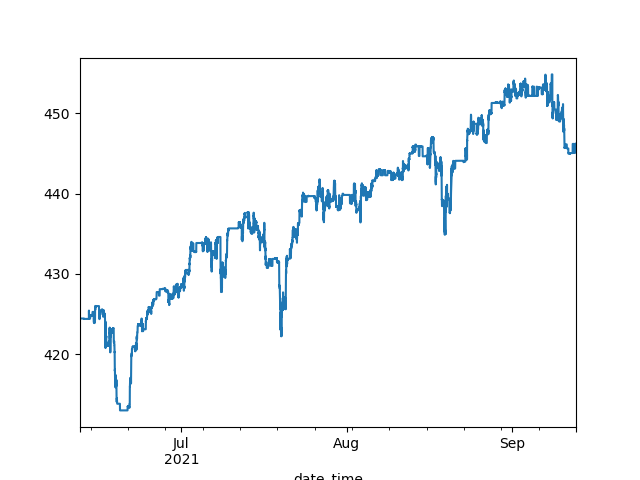

In [4]:
%matplotlib widget
klines_dict["ftx_SPY/USD"]["5m"]["close"]["2021-06-12":"2021-09-12"].plot()

2409it [00:04, 531.13it/s]D:\Users\Shaik Reza Shafiq\Desktop\Tide\backtest\backtest.py:27: RuntimeWarning: invalid value encountered in double_scalars
  z = (np.mean(tail) - np.mean(log_ret)) / np.std(log_ret)
26782it [00:57, 464.37it/s]


                          L       S        A        B
Sharpe                 0.45   -0.14     0.18     0.41
Total Return %        20.47  -11.58     8.89    23.31
Equity Start $         1000    1000     2000     1000
Total Return $       203.12 -115.79    87.33   238.47
Fees $                  0.0     0.0      0.0      0.0
Equity End $        1203.12  884.21  2087.33  1238.47
avg_wins              9.128     7.5    8.307    0.002
avg_loss             -7.382  -7.948   -7.661   -0.002
Profit Factor         1.154   0.917    1.032    1.014
total_trades            346     345      691        1
MDD %                 -22.7   -29.0    -32.0    -31.4
Win Rate %             48.3    49.3     48.8    100.0
Time in Trade Mean     45.2    33.2     38.6  26782.0
Time in Trade Max       769     567      769    26782
Time in Trade Min         2       2        2    26782

Backtesting 2021-06-12 00:00:00 to 2021-09-12 23:55:00 (26782 rows)
Runtimes
backtesting: 57.709s
metrics calc: 0.094s
plots calc: 0.56

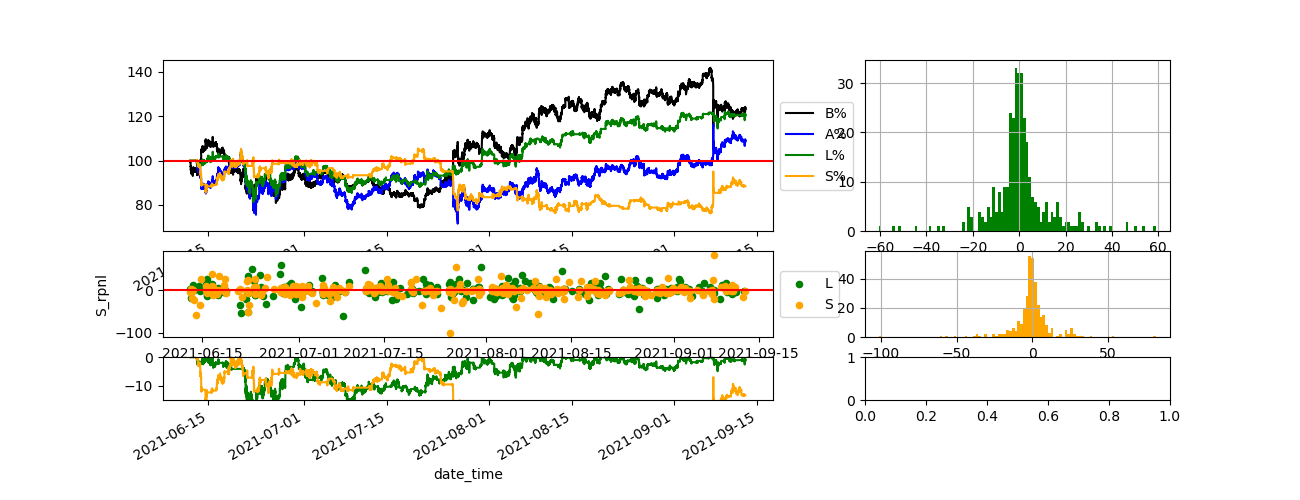

In [2]:
%matplotlib widget
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)



df_backtested,df_trades,df_summary = backtest.backtest(df0,
                                                       covariates = klines_dict["ftx_SPY/USD"]["5m"],
                                                       kline_to_trade = "5m_close",
                                                       window=["2021-06-12","2021-09-12"],
                                                       signals=None,
                                                       signal_function="covariated",
                                                      fee=0,
                                                      slippage=0)

In [60]:
df_trades.filter(regex="L")

,L_id,L_positions,L_entry_price,L_cost,L_qty,L_exit_price,L_rpnl,L_fees,cum_L_rpnl
date_time,,,,,,,,,
2021-06-13 00:50:00,1.0,1.0,35652.6926,1000.0,0.028048,NaN,NaN,NaN,NaN
2021-06-13 00:55:00,1.0,0.0,NaN,1000.0,0.028048,35729.7157,0.758860,1.401512,0.758860
2021-06-13 01:00:00,2.0,1.0,35877.7601,1000.0,0.027872,NaN,NaN,NaN,0.758860
2021-06-13 02:05:00,2.0,0.0,NaN,1000.0,0.027872,35794.7352,-3.712485,1.398380,-2.953625
2021-06-13 02:10:00,3.0,1.0,35725.7145,1000.0,0.027991,NaN,NaN,NaN,-2.953625
...,...,...,...,...,...,...,...,...,...
2021-09-11 02:00:00,345.0,1.0,45415.6206,1000.0,0.022019,NaN,NaN,NaN,-273.948794
2021-09-11 06:35:00,345.0,0.0,NaN,1000.0,0.022019,45260.5741,-4.811557,1.397610,-278.760351
2021-09-12 08:45:00,346.0,1.0,45963.7850,1000.0,0.021756,NaN,NaN,NaN,-278.760351


In [62]:
df_trades["L_fees"].sum()

484.542184332748

In [61]:
df_trades["L_rpnl"].sum()

-281.42170897843636

Runtime:
Generating signals 25033 rows: 0.132s
                           L         S         A        B
Sharpe                 10.65     10.22     14.85      0.7
Total Return %       2400.12   2176.61   4576.73   100.08
Equity Start $          1000      1000      2000     1000
Total Return $      24001.21  21757.86  45759.07   997.01
Fees $               1616.73   1582.46   3199.19      0.0
Equity End $        25001.21  22757.86  47759.07  1997.01
avg_wins              24.026    22.058    23.047    0.005
avg_loss              -2.208    -2.462    -2.339   -0.005
Profit Factor         83.979    64.116    73.178    1.025
total_trades            1142      1142      2284        1
MDD %                   -1.3      -1.3      -1.1    -82.2
Win Rate %              88.5      87.7      88.1    100.0
Time in Trade Mean      12.4      11.5      11.0  25030.0
Time in Trade Max         84        76        84    25030
Time in Trade Min          2         2         2    25030

Backtesting 2019-09-07 0

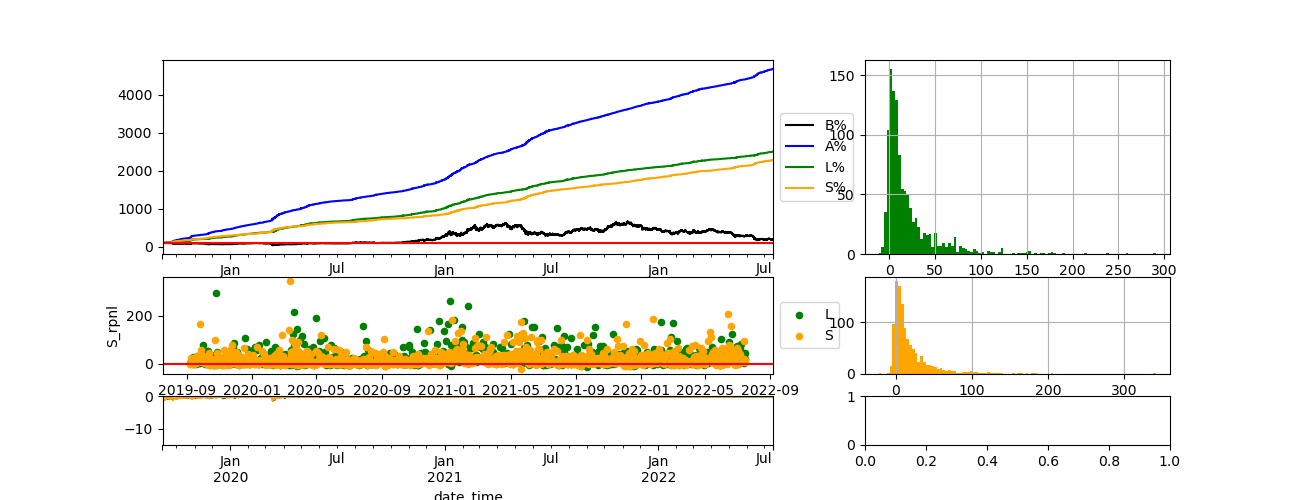

In [103]:
%matplotlib widget
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)

# for tf in config["strategy"]["timeframes"]:
#     df[f"{tf}_ebb"] = df[f"{tf}_ebb_fast"] - df[f"{tf}_ebb_slow"]
#     df[f"{tf}_ebb_low"] = df[f"{tf}_low"] - df[f"{tf}_ebb_slow"]
#     df[f"{tf}_ebb_high"] = df[f"{tf}_high"] - df[f"{tf}_ebb_slow"]
    
# def bb(data, sma, window,z=1.2,plot=False):
#     std = data.rolling(window = window).std()
#     upper_bb = sma + std * z
#     lower_bb = sma - std * z
#     if plot:
#         return upper_bb.shift(1), lower_bb.shift(1)
#     else:
#         return upper_bb, lower_bb
    
# L_window = 10
# L_z= 1.2
# S_window = 8
# S_z= 1.2

# L_window = 21
# L_z= 1.5
# S_window = 21
# S_z= 1.5

# # df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], window=L_window, z=L_z)
# df['upper_L'], df['lower_L'] = bb(df["1h_low"], df["1h_ebb_fast"], window=L_window, z=L_z)
# df['upper_S'], df['lower_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], window=S_window, z=S_z)
# df["lz"]=df["1h_ebb_low"]-df["1h_ebb_low"].rolling(34).std()
# df["lz"]=df["lz"].shift(1)
# df["uz"]=df["1h_ebb_high"]+df["1h_ebb_high"].rolling(34).std()
# df["uz"]=df["uz"].shift(1)
tf="2h"
pre_signals = [f"{tf}_ebb_fast",f"{tf}_ebb_slow", 
               f"{tf}_tide_fast",f"{tf}_tide_slow"]
# df=backtest.backtest(df,signals=pre_signals,signal_function="get_signal_MR",short_notional=0,produce_signal=True,signal_name="Y")
df=backtest.backtest(df,signals=pre_signals,signal_function="TF",produce_signal=True, signal_name="Y" )
signals = ["Y"]
df["Y"]=df["Y"].shift(-3)
df.dropna(inplace=True)
df_backtested,df_trades,df_summary = backtest.backtest(df,signals=signals)

In [83]:
df_trades[df_trades["L_rpnl"]==df_trades["L_rpnl"].min()]

,L_id,L_positions,L_entry_price,L_cost,L_qty,L_exit_price,L_rpnl,L_fees,S_id,S_positions,S_entry_price,S_cost,S_qty,S_exit_price,S_rpnl,S_fees,A_rpnl,cum_L_rpnl,cum_S_rpnl
date_time,,,,,,,,,,,,,,,,,,,
2022-03-02 16:00:00,730.0,0.0,NaN,1000.0,0.022276,44289.2828,-14.804755,1.39061,730.0,-1.0,44262.7172,1000.0,0.022592,NaN,NaN,NaN,-14.804755,15459.527133,14222.439364


In [92]:
i=730
df_backtested[df_backtested["L_id"]==i].filter(regex="(^1h_close$)|(^L_)")

,1h_close,L_id,L_positions,L_entry_price,L_cost,L_qty,L_exit_price,L_fees,L_pnl,L_rpnl
date_time,,,,,,,,,,
2022-03-02 14:00:00,44878.0,730.0,1.0,44891.4634,1000.0,0.022276,NaN,NaN,NaN,NaN
2022-03-02 15:00:00,44151.0,730.0,1.0,NaN,1000.0,0.022276,NaN,NaN,-16.494526,NaN
2022-03-02 16:00:00,44276.0,730.0,0.0,NaN,1000.0,0.022276,44289.2828,1.39061,NaN,-14.804755


In [24]:
i=7
window = ["2021-05-01","2021-05-15"]
# df_trades[df_trades["L_id"]==i].filter(regex="L")
df_trades[window[0]:window[1]].filter(regex="L")

,L_id,L_positions,L_entry_price,L_cost,L_qty,L_exit_price,L_rpnl,L_fees,cum_L_rpnl
date_time,,,,,,,,,
2021-05-02 06:00:00,129.0,0.0,NaN,1000.0,0.360369,2913.57381,48.527176,1.434974,685.438203
2021-05-02 12:00:00,130.0,1.0,2927.87810,1000.0,0.341544,NaN,NaN,NaN,685.438203
2021-05-04 02:00:00,130.0,0.0,NaN,1000.0,0.341544,3228.86837,101.329542,1.471961,786.767745
2021-05-04 06:00:00,131.0,1.0,3355.70641,1000.0,0.298000,NaN,NaN,NaN,786.767745
2021-05-04 16:00:00,131.0,0.0,NaN,1000.0,0.298000,3268.38022,-27.404975,1.381784,759.362770
2021-05-04 20:00:00,132.0,1.0,3406.22156,1000.0,0.293580,NaN,NaN,NaN,759.362770
2021-05-04 23:00:00,132.0,0.0,NaN,1000.0,0.293580,3239.57158,-50.290926,1.365752,709.071844
2021-05-05 09:00:00,133.0,1.0,3381.01400,1000.0,0.295769,NaN,NaN,NaN,709.071844
2021-05-06 07:00:00,133.0,0.0,NaN,1000.0,0.295769,3443.43272,17.048615,1.412923,726.120460


In [94]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)
# df_backtested['u_ebb'], df_backtested['l_ebb'] = bb(df_backtested["1h_high"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
# df_backtested['upper_L'], df_backtested['lower_L'] = bb(df_backtested["1h_low"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
# df_backtested['upper_S'], df_backtested['lower_S'] = bb(df_backtested["1h_ebb_high"], df_backtested["1h_ebb_high"], window=S_window, z=S_z, plot=True)
ps = plotly_studies.build(cols_to_plot = ["1h_tide_slow","1h_tide_fast",
                                          ["cum_L_pnl"],#,"cum_S_pnl","cum_A_pnl"],
                                          ["OHLC_1h", 
                                          'L_entry_price',
                                          'L_exit_price',
                                          'S_entry_price',
                                          'S_exit_price',
                                           "2h_ebb_slow","2h_ebb_fast",
                                          ],
                                          ["1h_MFI_8"],
                                         ], row_heights = [1,1,1,4,1], height=1000,width=1000)
ps.plot(df_backtested["2021-01-01":"2021-01-05"])

plotting: 1h_tide_slow
1h_tide_slow -> cat data detected
plotting: 1h_tide_fast
1h_tide_fast -> cat data detected
plotting: ['cum_L_pnl']
plotting: ['cum_L_pnl'] --> LIST DETECTED
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '2h_ebb_slow', '2h_ebb_fast']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '2h_ebb_slow', '2h_ebb_fast'] --> LIST DETECTED
plotting: ['1h_MFI_8']
plotting: ['1h_MFI_8'] --> LIST DETECTED


FigureWidgetResampler({
    'data': [{'marker': {'size': 4},
              'mode': 'markers',
              'n…

### ii) Test 2

In [ ]:
%matplotlib widget
import importlib

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)

df=df0.copy()
for tf in config["strategy"]["timeframes"]:
    df[f"{tf}_ebb"] = df[f"{tf}_ebb_fast"] - df[f"{tf}_ebb_slow"]
    df[f"{tf}_ebb_low"] = df[f"{tf}_low"] - df[f"{tf}_ebb_slow"]
    df[f"{tf}_ebb_high"] = df[f"{tf}_high"] - df[f"{tf}_ebb_slow"]
    
def bb(data, sma, window,z=1.2,plot=False):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * z
    lower_bb = sma - std * z
    if plot:
        return upper_bb.shift(1), lower_bb.shift(1)
    else:
        return upper_bb, lower_bb
    
L_window = 10
L_z= 1.2
S_window = 8
S_z= 1.2

# L_window = 21
# L_z= 1.5
# S_window = 21
# S_z= 1.5

# df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], window=L_window, z=L_z)
df['upper_L'], df['lower_L'] = bb(df["1h_low"], df["1h_ebb_fast"], window=L_window, z=L_z)
df['upper_S'], df['lower_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], window=S_window, z=S_z)
# df["lz"]=df["1h_ebb_low"]-df["1h_ebb_low"].rolling(34).std()
# df["lz"]=df["lz"].shift(1)
# df["uz"]=df["1h_ebb_high"]+df["1h_ebb_high"].rolling(34).std()
# df["uz"]=df["uz"].shift(1)
signals = ["1h_tide_slow","1h_ebb_slow", 
           "1h_tide_fast","1h_ebb_fast",
           "upper_L","lower_L",
           "upper_S", "lower_S",
          "1h_ebb_high"]
df_backtested,df_trades,df_summary = backtest.backtest(df,signals=signals,window=["2021-01-01","2021-12-31"])

In [ ]:
df_backtested[["L_positions","S_positions"]]

In [ ]:
df_backtested["S_positions"] = -df_backtested["S_positions"]
df_backtested[["L_positions","S_positions"]].sum(axis=1)

In [ ]:
df_backtested["S_positions"] 

In [ ]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)
# df_backtested['u_ebb'], df_backtested['l_ebb'] = bb(df_backtested["1h_high"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
df_backtested['upper_L'], df_backtested['lower_L'] = bb(df_backtested["1h_low"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
df_backtested['upper_S'], df_backtested['lower_S'] = bb(df_backtested["1h_ebb_high"], df_backtested["1h_ebb_high"], window=S_window, z=S_z, plot=True)
ps = plotly_studies.build(cols_to_plot = ["1h_tide_slow","1h_tide_fast",
                                          ["cum_L_pnl"],#,"cum_S_pnl","cum_A_pnl"],
                                          ["OHLC_1h", 
                                          'L_entry_price',
                                          'L_exit_price',
                                          # 'S_entry_price',
                                          # 'S_exit_price',
                                           "1h_ebb_slow","1h_ebb_fast","upper_L","lower_L","21h_ebb_slow","21h_ebb_fast"
                                          ],
                                          ["1h_MFI_8"],
                                         ], row_heights = [1,1,1,4,1], height=1000,width=1000)
ps.plot(df_backtested["2021-07-01":"2021-07-31"])

### iii) MULTI BACKTEST

In [ ]:
def bb(data, sma, window,z=1.2,plot=False):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * z
    lower_bb = sma - std * z
    if plot:
        return upper_bb.shift(1), lower_bb.shift(1)
    else:
        return upper_bb, lower_bb

for instrument,df in klines_indicators_dict.items():
    for tf in ["1h","2h"]:
        df[f"{tf}_ebb"] = df[f"{tf}_ebb_fast"] - df[f"{tf}_ebb_slow"]
        df[f"{tf}_ebb_low"] = df[f"{tf}_low"] - df[f"{tf}_ebb_slow"]
        df[f"{tf}_ebb_high"] = df[f"{tf}_high"] - df[f"{tf}_ebb_slow"]



    z=1.2
    window = 8
    df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], z=z, window=window)
    df['u_ebb_S'], df['l_ebb_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], z=z, window=window)
    df['u_ebb_L'], df['l_ebb_L'] = bb(df["1h_ebb_low"], df["1h_ebb_low"], z=z, window=window)

In [ ]:
%matplotlib widget
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

signals = ["1h_tide_slow","1h_tide_fast",
           "1h_ebb_slow", "1h_ebb_fast",
           "1h_ebb_high","u_ebb_S","l_ebb_S",
           "1h_ebb_low","u_ebb_L","l_ebb_L",
           "12h_ebb_slow","12h_ebb_fast"]
backtested_dict,trades_dict,summary_dict = backtest.multi_backtest(klines_indicators_dict,signals=signals,window=["2021-01-01","2022-12-31"])

# 1) Preprocessing

## a) Feature Engineering

In [104]:
%matplotlib widget
import importlib

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)


def bb(data, sma, window,z=1.2,plot=False):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * z
    lower_bb = sma - std * z
    if plot:
        return upper_bb.shift(1), lower_bb.shift(1)
    else:
        return upper_bb, lower_bb

# z=1.2
# window = 8
# df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], z=z, window=window)
# df['u_ebb_S'], df['l_ebb_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], z=z, window=window)
# df['u_ebb_L'], df['l_ebb_L'] = bb(df["1h_ebb_low"], df["1h_ebb_low"], z=z, window=window)

def build_features(df_original,signal_function="TF",tf="1h"):
    df=df_original.copy()
    
    pre_signals = [f"{tf}_ebb_fast",f"{tf}_ebb_slow", 
                   f"{tf}_tide_fast",f"{tf}_tide_slow"]
    # df=backtest.backtest(df,signals=pre_signals,signal_function="get_signal_MR",short_notional=0,produce_signal=True,signal_name=signal_name)
    df=backtest.backtest(df,signals=pre_signals,signal_function=signal_function,produce_signal=True)

    tfs = [i.split("_")[0] for i in list(df.filter(regex="high"))]
    """
    x-y, x-y, x-y, 
    for y in [high, low, close]
    for x in [open, ebb, flow] for all timeframes
    """
    closeTimes = list(df.filter(regex="closeTime").columns)
    ohlc = list(df.filter(regex="(_open$)|(_high$)|(_low$)|(_close$)").columns)
    tides = list(df.filter(regex="tide").columns)
    mfis = list(df.filter(regex="MFI").columns)
    ebbs = list(df.filter(regex="ebb").columns)

    emas = []# list(df.filter(regex="EMA").columns)
#     df1 = df[[f"{tf}_close" for tf in tfs] +closeTimes +tides+mfis].copy() #+emas
    df1 = df[ohlc +closeTimes +tides+ebbs +mfis +["signal"]].copy() #+emas
    df1["signal"] = df1["signal"].astype("int")
    # df1["slopes"] = np.where(df["1h_slope_avg_500_10"]>df["1h_slope_u_500_10"],1,0)  + np.where(df["1h_slope_avg_500_10"]<df["1h_slope_l_500_10"],-1,0)
    for tide in tides:
        df1[tide] = df1[tide].astype("int")
        

    temp_deltas ={}
    
    # bb of ebbs
    for tf in tfs[0:1]:
        for ebb in ["ebb_fast","ebb_slow"]:
            for window in [8,10,12]:
                for z in [1,1.2,1.5]:
                    
                    u_ebb, l_ebb = bb(df[f"{tf}_low"], df[f"{tf}_{ebb}"], z=z, window=window)
                    temp_deltas[f"{tf}_u_L_{ebb}_{window}_{z}"] = u_ebb
                    temp_deltas[f"{tf}_l_L_{ebb}_{window}_{z}"] = l_ebb
                    
                    u_ebb, l_ebb = bb(df[f"{tf}_high"], df[f"{tf}_{ebb}"], z=z, window=window)
                    temp_deltas[f"{tf}_u_S_{ebb}_{window}_{z}"] = u_ebb
                    temp_deltas[f"{tf}_l_S_{ebb}_{window}_{z}"] = l_ebb
    # Deltas of features with OHLC in timeframes
    for tf in tfs:
        for ebb in ["ebb_fast","ebb_slow"]:
            temp_deltas[f"{tf}_{ebb}_delta"] =  df[f"{tf}_{ebb}"].pct_change()
            for x in ["open","high", "low", "close"]:
                    temp_deltas[f"{tf}_{x}_{ebb}"] = df[f"{tf}_{x}"] - df[f"{tf}_{ebb}"]
                    # temp_deltas[f"{tf}_{x}_{y}_avg"] = df[[f"{tf}_{x}",f"{tf}_{y}"]].mean(axis=1)
                
    # Inter timeframes features and their deltas
    for i in range(0,len(tfs)):
        for j in range(i):
            # print(f"{tfs[i]}_{tfs[j]}")
            for ebb in ["ebb_fast","ebb_slow"]:
                temp_deltas[f"{tfs[j]}_{tfs[i]}_{ebb}"] = df[f"{tfs[j]}_{ebb}"] - df[f"{tfs[i]}_{ebb}"] 
            # temp_deltas[f"{tfs[j]}_{tfs[i]}_ebb_delta"] = temp_deltas[f"{tfs[j]}_{tfs[i]}_ebb"].diff()
            
            # temp_deltas[f"{tfs[j]}_{tfs[i]}_MFI"] = df[f"{tfs[j]}_MFI_13"] - df[f"{tfs[i]}_MFI_13"] 
            
            # temp_deltas[f"{tfs[j]}_{tfs[i]}_MFI_delta"] = temp_deltas[f"{tfs[j]}_{tfs[i]}_MFI"].diff()
            # df1[f"{tfs[j]}_{tfs[i]}_flow"] = df[f"{tfs[j]}_flow"] - df[f"{tfs[i]}_flow"] 
#     df1["1h_4h_ebb"] = df["1h_ebb"]-df["4h_ebb"]
#     df1["1h_24h_ebb"] = df["1h_ebb"]-df["24h_ebb"]
#     df1["4h_24h_ebb"] = df["4h_ebb"]-df["24h_ebb"]
#     df1["4h_48h_ebb"] = df["4h_ebb"]-df["48h_ebb"]      
    df1 = pd.concat([df1,pd.DataFrame(temp_deltas)],axis=1)
    print(f"Features for {list(df1.filter(regex='h_open$').columns)}: \n{list(df1.filter(regex='1h').columns)}")
    print(f"added number of features: {len(df_original.columns)} --> {len(df1.columns)}")
    return df1


df1 = build_features(df0,signal_function="TF",tf="2h")    
        

Runtime:
Generating signals 25056 rows: 0.125s
Features for ['1h_open', '2h_open', '3h_open', '4h_open', '5h_open', '8h_open', '13h_open', '21h_open']: 
['1h_open', '1h_high', '1h_low', '1h_close', '21h_open', '21h_high', '21h_low', '21h_close', '1h_closeTime', '21h_closeTime', '1h_tide_slow', '1h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '21h_ebb_slow', '21h_ebb_fast', '1h_MFI_8', '1h_MFI_13', '1h_MFI_21', '1h_MFI_34', '1h_MFI_55', '21h_MFI_8', '21h_MFI_13', '21h_MFI_21', '21h_MFI_34', '21h_MFI_55', '1h_u_L_ebb_fast_8_1', '1h_l_L_ebb_fast_8_1', '1h_u_S_ebb_fast_8_1', '1h_l_S_ebb_fast_8_1', '1h_u_L_ebb_fast_8_1.2', '1h_l_L_ebb_fast_8_1.2', '1h_u_S_ebb_fast_8_1.2', '1h_l_S_ebb_fast_8_1.2', '1h_u_L_ebb_fast_8_1.5', '1h_l_L_ebb_fast_8_1.5', '1h_u_S_ebb_fast_8_1.5', '1h_l_S_ebb_fast_8_1.5', '1h_u_L_ebb_fast_10_1', '1h_l_L_ebb_fast_10_1', '1h_u_S_ebb_fast_10_1', '1h_l_S_ebb_fast_10_1', '1h_u_L_ebb_fast_10_1.2', '1h_l_L_ebb_fast_10_1.2', '1h_u_S_ebb_fast_10_

## b) Build labels
Triple barrier with 4 parameters          
    - time barrier          
    - vol lookback (for thresholds)          
    - multiplier for thresholds (upper_z, lower_z)

In [105]:
from strategy import labels
import importlib
importlib.reload(labels)

# df_labelled = labels.calc_triple_barrier(df1,
#                                          col_series="1h_close",
#                                          col_timestamps = "1h_closeTime",
#                                          horizon_delta = 4,
#                                          vol_span = 3,
#                                          upper_z = 1,
#                                          lower_z = -1,
#                                          resample= None,
#                                          side="signal",
#                                          labels=3,
#                                          fill_no_trades=False)
# This has best ost performace so far but low accuracy! 


df_labelled = labels.calc_triple_barrier(df1,
                                         col_series="1h_close",
                                         col_timestamps = "1h_closeTime",
                                         horizon_delta = 12,
                                         vol_span = 24,
                                         upper_z = 2,
                                         lower_z = -2,
                                         upper_delta=0.01,
                                         lower_delta=-0.01,
                                         side="signal",
                                         labels=3,
                                         fill_no_trades=False)

# print(f"labels: {df_labelled['label'].unique()}")

25056it [00:10, 2386.25it/s]


In [106]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
# creating dataframe of only bin labels
primary_forecast = pd.DataFrame(df_labelled['p_target'])

# setting predicted column to 1 
primary_forecast['pred'] = 1
primary_forecast.columns = ['actual', 'pred']

# Performance Metrics
actual = primary_forecast['actual']
pred = primary_forecast['pred']
print(classification_report(y_true=actual, y_pred=pred))

print("Confusion Matrix")
print(confusion_matrix(actual, pred))

print('')
print("Accuracy")
print(accuracy_score(actual, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15118
           1       0.40      1.00      0.57      9938

    accuracy                           0.40     25056
   macro avg       0.20      0.50      0.28     25056
weighted avg       0.16      0.40      0.23     25056

Confusion Matrix
[[    0 15118]
 [    0  9938]]

Accuracy
0.3966315453384419


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## c) Feature/ Label Analysis


Label engineering:    
Need labels to comply with trends, need rules:    
- 

### i) Perfect Trades Analysis (for labels)

                           L        S         A        B
Sharpe                 10.82    10.83     16.68     0.72
Total Return %       2195.88  2203.47   4399.35   107.09
Equity Start $          1000     1000      2000     1000
Total Return $      21958.77  22034.7  43993.47  1073.58
Fees $               1604.09  1527.71    3131.8      0.0
Equity End $        22958.77  23034.7  45993.47  2073.58
avg_wins                20.5   20.786    20.642    0.005
avg_loss             -10.177   -19.75   -13.468   -0.005
Profit Factor         52.371   51.712    52.039    1.026
total_trades            1134     1103      2237        1
MDD %                   -2.5     -1.9      -0.7    -82.0
Win Rate %              96.3     98.0      97.1    100.0
Time in Trade Mean       7.3      7.1      11.2  25056.0
Time in Trade Max         48       71        71    25056
Time in Trade Min          2        2         2    25056

Backtesting 2019-09-06 18:00:00 to 2022-07-16 17:00:00 (25056 rows)
Runtimes
backtestin

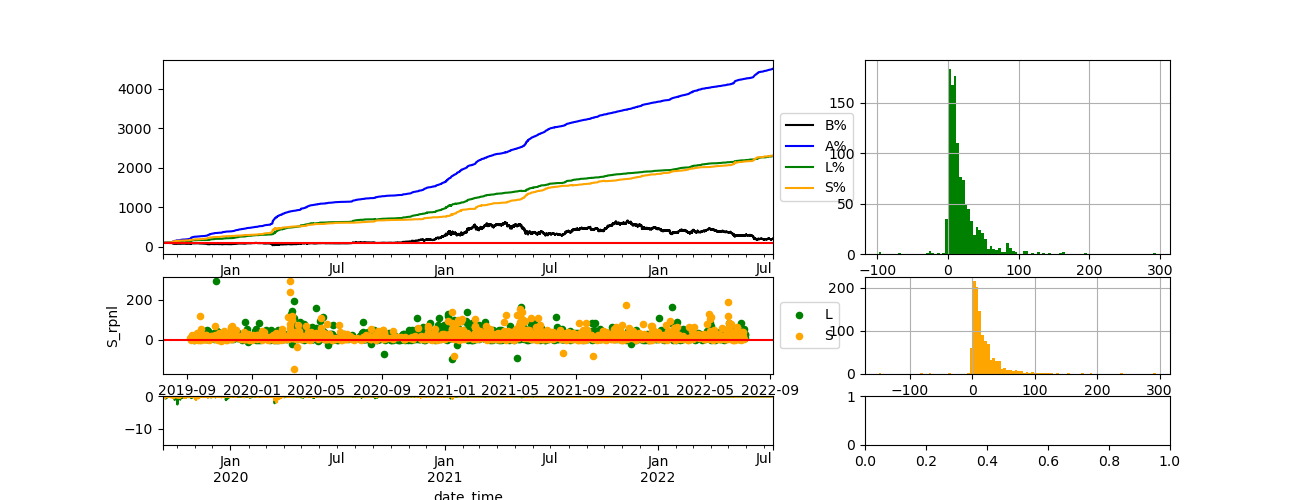

In [107]:
%matplotlib widget
import importlib
from backtest import backtest
importlib.reload(backtest)
# signals = ["p","signal"]
signals = ["p_target","signal"]
labelled_backtested,labelled_trades,labelled_summary = backtest.backtest(df_labelled,signals=signals,signal_function = "meta_target")

In [88]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)
ps = plotly_studies.build(cols_to_plot = [["cum_L_pnl",
                                           "cum_S_pnl"],
                                          ["OHLC_1h",
                                          'L_entry_price',
                                          'L_exit_price',
                                          'S_entry_price',
                                          'S_exit_price',
                                          '1h_ebb_fast', "1h_ebb_slow"],
                                          "p_target","signal","label",
                                         ], row_heights = [1,3,1,1,1], height=1000,width=1000)
ps.plot(labelled_backtested["2022-01-01":"2022-02-10"])
#[["1h_4h_ebb_delta"],["1h_4h_ebb"],["OHLC_1h","1h_ebb","2h_ebb","4h_ebb"],["1h_MFI_13","2h_MFI_13"]]

plotting: ['cum_L_pnl', 'cum_S_pnl']
plotting: ['cum_L_pnl', 'cum_S_pnl'] --> LIST DETECTED
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast', '1h_ebb_slow']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast', '1h_ebb_slow'] --> LIST DETECTED
plotting: p_target
p_target -> cat data detected
plotting: signal
signal -> cat data detected
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': 'cum_L_pnl',
              'type': 'scattergl',
              'u…

In [61]:
df_labelled.tail(10)[["1h_close","1h_closeTime","t","t1","label","p_target"]]

,1h_close,1h_closeTime,t,t1,label,p_target
date_time,,,,,,
2022-08-08 22:00:00,23814.0,1.659996e+09,1.659996e+09,1.660007e+09,0.0,0
2022-08-08 23:00:00,23816.0,1.660000e+09,1.660000e+09,1.660010e+09,0.0,0
2022-08-09 00:00:00,23798.0,1.660003e+09,1.660003e+09,1.660014e+09,0.0,0
2022-08-09 01:00:00,23736.0,1.660007e+09,1.660007e+09,1.660018e+09,0.0,0
2022-08-09 02:00:00,23813.0,1.660010e+09,1.660010e+09,1.660021e+09,0.0,0
2022-08-09 03:00:00,23836.0,1.660014e+09,1.660014e+09,1.660025e+09,0.0,0
2022-08-09 04:00:00,23892.0,1.660018e+09,1.660018e+09,1.660028e+09,0.0,0
2022-08-09 05:00:00,23881.0,1.660021e+09,1.660021e+09,1.660032e+09,0.0,0
2022-08-09 06:00:00,23853.0,1.660025e+09,1.660025e+09,1.660036e+09,0.0,0


# 2) Baseline: Catboost Classifier
Things to tune

- train window
- test window


## a) Single Step Train Test

### i) Train-test split

TOTAL window: 2019-09-07 05:00:00 ----> 2022-07-16 17:00:00, len: 25045
TRAIN window: 2021-01-01 00:00:00 ----> 2021-09-30 23:00:00, len: 6552
TOTAL TRAIN window: 2021-01-01 00:00:00 ----> 2021-12-31 23:00:00, len: 8760
VAL window: 2021-10-01 00:00:00 ----> 2021-12-31 23:00:00, len: 2208
TEST window: 2022-01-01 00:00:00 ----> 2022-03-31 23:00:00, len: 2160
VAL/TRAIN: 0.25205479452054796

caat features:
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast']

labels:
['p_target']
features: 
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '2h_ebb_s

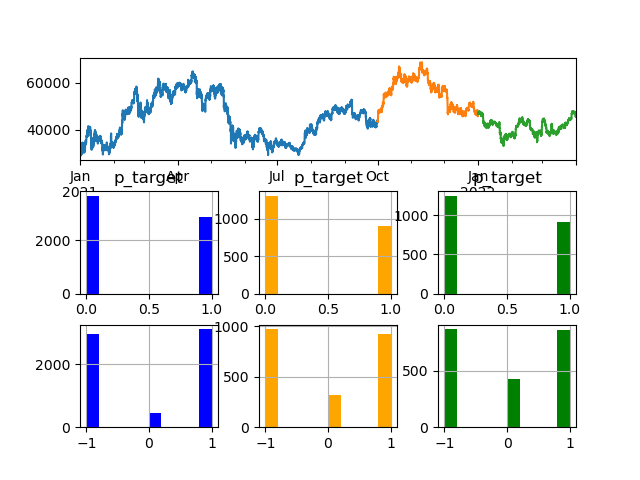

In [108]:
from catboost import Pool

import numpy as np
train_window = ["2021-01-01",'2021-09-30']
val_window = ["2021-10-01",'2021-12-31']
test_window = ['2022-01-01','2022-03-31']

# train_window = ["2021-02-01",'2021-10-31']
# val_window = ["2021-11-01",'2022-01-31']
# test_window = ['2022-02-01','2022-04-30']

# train_window = ["2021-01-01",'2021-09-30']
# val_window = ["2021-10-01",'2021-12-31']
# test_window = ['2022-01-01','2022-12-31']
df = df_labelled.drop(columns=['t', 't1']).copy()
# df=df.filter(regex="(1h)|(label)")
df.dropna(inplace=True)
# df= df.filter(regex="(1h)|(label)")

features = list(df.filter(regex="(MFI)|(ebb)|(tide)")) #|(MFI)|(EMA)|(tidex$)
cat_features = list(df.filter(regex="(tide)"))
labels = ['p_target'] 

df_train = df[train_window[0]:train_window[1]].copy()
df_train_full = df[train_window[0]:val_window[1]].copy()
df_val = df[val_window[0]:val_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TOTAL TRAIN window: {df_train_full.index[0]} ----> {df_train_full.index[-1]}, len: {len(df_train_full)}")
print(f"VAL window: {df_val.index[0]} ----> {df_val.index[-1]}, len: {len(df_val)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")
print(f"VAL/TRAIN: {len(df_val)/(len(df_val)+len(df_train))}")
print(f"\ncaat features:\n{cat_features}")
print(f"\nlabels:\n{labels}\nfeatures: \n{features}")


%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplot_mosaic("AAA;BCD;EFG")
df_train["1h_close"].plot(ax=axs["A"])
df_val["1h_close"].plot(ax=axs["A"])
df_test["1h_close"].plot(ax=axs["A"])
df_train[labels].hist(ax=axs["B"], color="blue")
df_val[labels].hist(ax=axs["C"],color="orange")
df_test[labels].hist(ax=axs["D"],color="green")
df_train["label"].hist(ax=axs["E"], color="blue")
df_val["label"].hist(ax=axs["F"],color="orange")
df_test["label"].hist(ax=axs["G"],color="green")
# df[test_window[1]:][labels].hist(ax=axs["D"],color="green")
# label_train = df_train[labels].value_counts()

train_dataset = Pool(df_train[features],df_train[labels], cat_features=cat_features)
train_full_dataset = Pool(df_train_full[features],df_train_full[labels], cat_features=cat_features)
val_dataset = Pool(df_val[features],df_val[labels],cat_features=cat_features)
test_dataset = Pool(df_test[features],df_test[labels],cat_features=cat_features)

# 

### ii) Train

In [109]:
# from catboost import CatBoostClassifier, Pool

# model = CatBoostClassifier(task_type="GPU",iterations=iterations)
# model.fit(X=df_train[features], y=df_train[labels],cat_features = cat_features, verbose=False,plot=True)
from catboost import CatBoostClassifier
import time
t0 = time.time()
model = CatBoostClassifier(task_type="GPU",iterations=200)
# grid = {'iterations': [100, 150, 200],
#         'learning_rate': [0.03, 0.1],
#         'depth': [2, 4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# model.grid_search(grid, train_dataset)
model.fit(train_dataset, eval_set=val_dataset, verbose=False,plot=True)
# model.fit(train_full_dataset, verbose=False,plot=True)
t1 = np.round(time.time()-t0,3)
print("train duration: {t1}s")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

train duration: {t1}s


### iii) Performance Evaluation

In [110]:
%matplotlib widget
from sklearn.metrics import accuracy_score, f1_score
import shap
cat_features=[]

def calc_accuracy(model, features,cat_features, labels, df_train,df_test, feature_importances=False):
    train_y_pred = model.predict(df_train[features])
    print("IST Model Accuracy: ", accuracy_score(df_train[labels], train_y_pred), "| f1_score: ", f1_score(df_train[labels], train_y_pred,average="weighted"))
    
    train_y_pred = model.predict(df_train[features])
    train_y_probs = model.predict_proba(df_train[features])
    
    test_y_pred = model.predict(df_test[features])
    test_y_probs = model.predict_proba(df_test[features])
    
    print("OST Model Accuracy: ", accuracy_score(df_test[labels], test_y_pred), "| f1_score: ", f1_score(df_test[labels], test_y_pred,average="weighted"))
    
    if feature_importances:
        df_fi = pd.DataFrame(model.feature_importances_, index=df_train[features].columns, ).sort_values(by=0,ascending=False)
        fi_top = df_fi[df_fi>1].dropna()
        print(fi_top)
        fi_bot = df_fi[df_fi<=1].dropna()
        print(fi_bot)
        
#         explainer = shap.TreeExplainer(model)
#         shap_values = explainer.shap_values(Pool(df_train[features], df_train[labels], cat_features=cat_features))
# #         shap.summary_plot(shap_values, df_train[features], plot_type="bar")
#         shap.summary_plot(shap_values, df_train[features])
    return test_y_pred,test_y_probs,train_y_pred,train_y_probs,fi_top,fi_bot

test_y_pred,test_y_probs,train_y_pred,train_y_probs,fi_top,fi_bot = calc_accuracy(model, features,cat_features, labels, df_train,df_test,feature_importances=True)

IST Model Accuracy:  0.6478937728937729 | f1_score:  0.6009778919754567
OST Model Accuracy:  0.5837962962962963 | f1_score:  0.4768094917299416
                               0
1h_MFI_34               5.601414
1h_u_S_ebb_fast_12_1    5.516672
13h_close_ebb_fast      5.214742
8h_13h_ebb_fast         4.876671
2h_MFI_34               4.780738
4h_MFI_34               4.440196
1h_u_L_ebb_slow_10_1.5  3.939678
8h_MFI_55               3.821777
5h_MFI_21               3.547710
2h_MFI_21               3.463014
8h_close_ebb_slow       2.929796
1h_8h_ebb_slow          2.921600
8h_low_ebb_slow         2.853065
1h_3h_ebb_slow          2.587869
5h_close_ebb_slow       2.529235
2h_MFI_8                2.526150
1h_l_S_ebb_slow_8_1.2   2.415722
4h_21h_ebb_fast         2.389820
4h_MFI_21               2.306850
1h_MFI_55               2.255602
2h_ebb_slow             2.228161
4h_MFI_13               1.972324
3h_4h_ebb_slow          1.803908
1h_u_L_ebb_slow_8_1.2   1.745824
4h_5h_ebb_slow          1.73950

### iv) Backtest

#### IST

                          L        S        A        B
Sharpe                  3.2     4.63     5.51     0.95
Total Return %        82.32   135.71   218.03    56.83
Equity Start $         1000     1000     2000     1000
Total Return $       861.62  1357.11  2218.73   591.43
Fees $               165.92   164.14   330.05      0.0
Equity End $        1861.62  2357.11  4218.73  1591.43
avg_wins             18.881   28.151   23.356    0.006
avg_loss            -12.894   -12.78  -12.834   -0.006
Profit Factor         2.554    3.212      2.9    1.032
total_trades            118      118      236        1
MDD %                 -12.3     -7.7     -8.8    -35.0
Win Rate %             63.6     59.3     61.4    100.0
Time in Trade Mean      9.0      9.8     37.0   8760.0
Time in Trade Max        60       50       60     8760
Time in Trade Min         2        2        2     8760

Backtesting 2021-01-01 00:00:00 to 2021-12-31 23:00:00 (8760 rows)
Runtimes
backtesting: 2.897s
metrics calc: 0.151s
pl

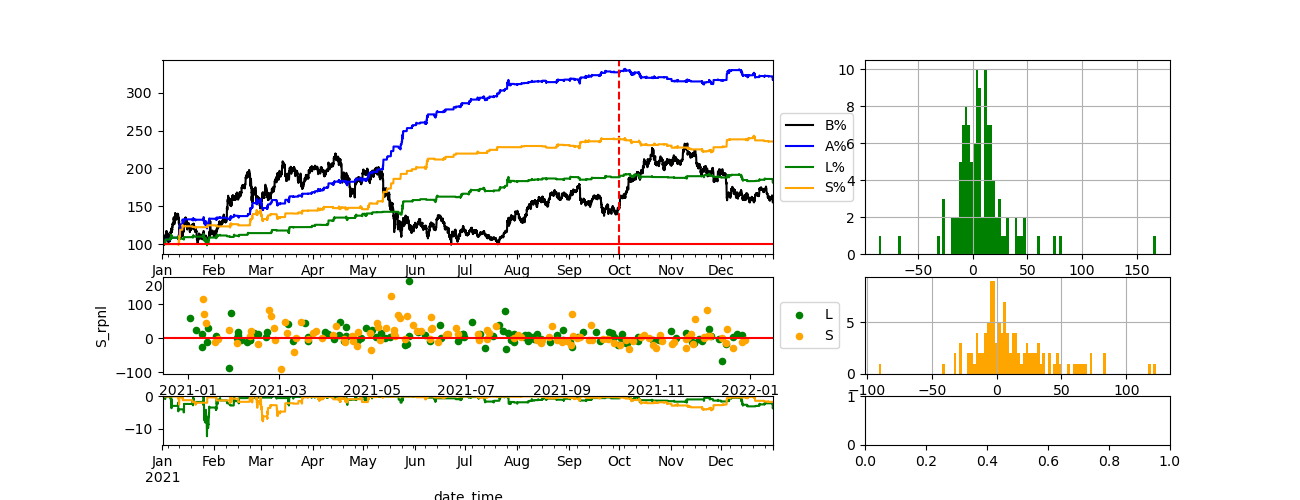

In [111]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget


df_IST = df[train_window[0]:val_window[1]].copy() 

IST_y_pred = model.predict(df_IST[features])
IST_y_probs = model.predict_proba(df_IST[features])

df_IST["Y"] = IST_y_pred
df_IST["p"] = IST_y_probs[:,1]

signals = ["signal","p"]
IST_backtested,IST_trades,IST_summary = backtest.backtest(df_IST, 
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          horizon_labels=[val_window[0]],
                                                          show_B=True)

#### OST

                         L       S        A       B
Sharpe               -0.63   -1.85    -1.78    0.17
Total Return %        -4.4  -10.24   -14.64   -2.71
Equity Start $        1000    1000     2000    1000
Total Return $      -43.98 -102.39  -146.37  -24.35
Fees $                49.0   43.44    92.44     0.0
Equity End $        956.02  897.61  1853.63  975.65
avg_wins            10.588   7.479    9.255   0.005
avg_loss           -17.049 -13.411  -15.171  -0.005
Profit Factor        0.828   0.523    0.689   1.006
total_trades            35      31       66       1
MDD %                -17.4   -16.3    -32.4   -34.6
Win Rate %            57.1    48.4     53.0   100.0
Time in Trade Mean     7.2     9.3     32.7  2160.0
Time in Trade Max       21      43       43    2160
Time in Trade Min        2       2        2    2160

Backtesting 2022-01-01 00:00:00 to 2022-03-31 23:00:00 (2160 rows)
Runtimes
backtesting: 0.708s
metrics calc: 0.077s
plots calc: 0.509s


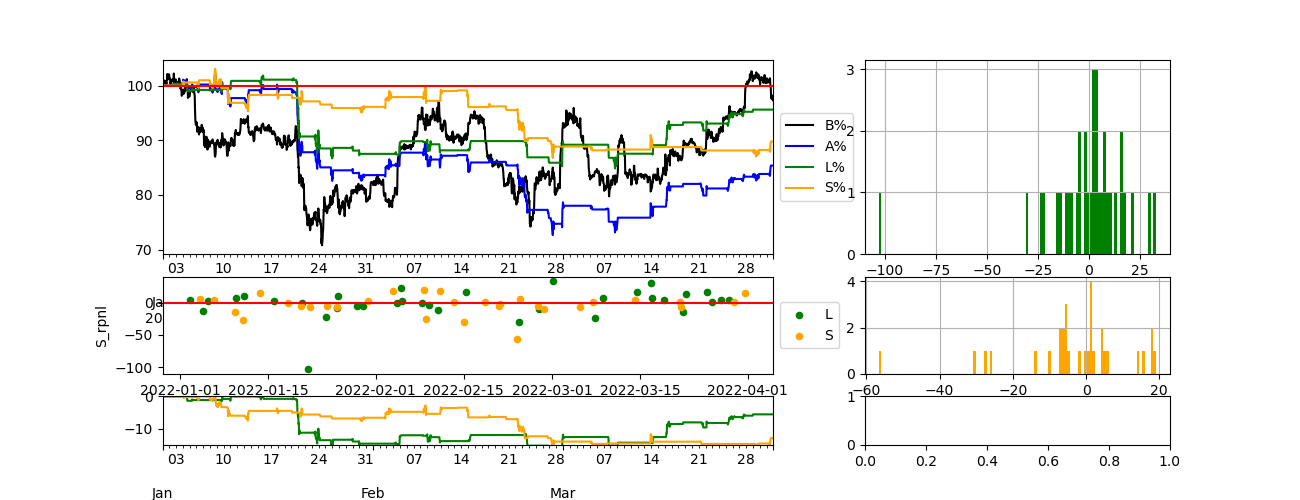

In [112]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget

df_OST = df_test.copy() 
OST_y_pred = model.predict(df_OST[features])
OST_y_probs = model.predict_proba(df_OST[features])
df_OST["Y"] = OST_y_pred
df_OST["p"] = OST_y_probs[:,1]

signals = ["signal","p"]

OST_backtested,OST_trades,OST_summary = backtest.backtest(df_OST,
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          show_B=True)

#### IST + VAL + OST

                          L        S        A        B
Sharpe                  4.1     3.86     5.27     0.84
Total Return %        95.87   165.68   261.54    54.45
Equity Start $         1000     1000     2000     1000
Total Return $       958.66  1656.77  2615.44   567.33
Fees $               130.96    200.3   331.26      0.0
Equity End $        1958.66  2656.77  4615.44  1567.33
avg_wins              22.75   36.448   30.748    0.006
avg_loss             -9.391  -19.672  -15.971   -0.006
Profit Factor         3.836    2.316    2.638    1.028
total_trades             93      144      237        1
MDD %                  -5.7     -6.0     -4.5    -35.0
Win Rate %             61.3     55.6     57.8    100.0
Time in Trade Mean      8.8     18.0     46.1  10920.0
Time in Trade Max        50       96       96    10920
Time in Trade Min         2        2        2    10920

Backtesting 2021-01-01 00:00:00 to 2022-03-31 23:00:00 (10920 rows)
Runtimes
backtesting: 3.57s
metrics calc: 0.158s
pl

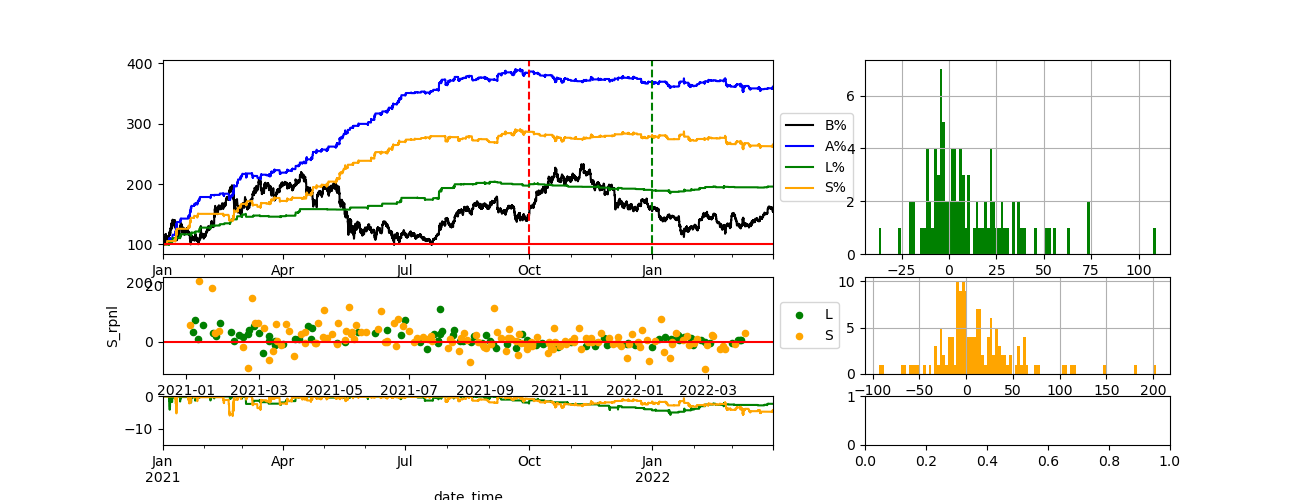

In [94]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget


df_ALL = df[train_window[0]:test_window[1]].copy() 

ALL_y_pred = model.predict(df_ALL[features])
ALL_y_probs = model.predict_proba(df_ALL[features])

df_ALL["Y"] = ALL_y_pred
df_ALL["p"] = ALL_y_probs[:,1]

signals = ["signal","p"]
ALL_backtested,ALL_trades,ALL_summary = backtest.backtest(df_ALL, 
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          horizon_labels=[val_window[0],test_window[0]],
                                                          show_B=True)

###  v) Trades Analysis


Want to catch BIG moves, so have to set labels to be 0 when moves are small and sucky.

In [97]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)


ps = plotly_studies.build(cols_to_plot = ["cum_L_rpnl",
                                          "cum_S_rpnl",
                                          ["OHLC_1h",
                                           'L_entry_price',
                                           'L_exit_price',
                                           'S_entry_price',
                                           'S_exit_price',
                                           '1h_ebb_fast'],
                                          "Y","p","p_target","signal","label",], row_heights = [1,1,4,1,1,1,1,1], height=1000,width=1000)
ps.plot(IST_backtested["2021-02-01":"2021-03-01"])

plotting: cum_L_rpnl
plotting: cum_S_rpnl
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast'] --> LIST DETECTED
plotting: Y
Y -> cat data detected
plotting: p
plotting: p_target
p_target -> cat data detected
plotting: signal
signal -> cat data detected
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': 'cum_L_rpnl',
              'type': 'scattergl',
              '…

In [36]:
np.quantile(OST_backtested[:"2022-06-12 19:00"].tail(12)["p"],0.9)

0.11441494889778706

In [38]:
OST_backtested["2022-06-12 19:00":"2022-06-12 19:00"]["p"]

date_time
2022-06-12 19:00:00    0.063125
Name: p, dtype: float64

In [40]:
p = OST_backtested["p"].copy().values

In [44]:
i=2131
p[i-12:i+1]

array([0.51590536, 0.57129378, 0.58547688, 0.63342906, 0.55847813,
       0.60432844, 0.67240084, 0.64724683, 0.61349516, 0.5440906 ,
       0.72051785, 0.56320327, 0.64444023])

In [43]:
p[i]

0.6444402343024823

## d) Cross validation
Here we seek to improve the model by including cross validation instead of a single train test to validate the model across a rolling timeframe. We also employ catboost instead of xgboost due to the inherent abundance of categorical data in the dataset the paper works in. The model thus aims to produce allocation metrices using the probabilities predicted for each label We will then study the predicted values and see if its any use

The model walks forward on an anchored expanding window setting to predict the future label (-1,1). The parameters involved in this cross validation are 
 - retrain_after_x_minutes: dictates the time elapsed before retraining the model
 - test_size : prediction window, for eg, currently set at 12 meaning, aside from predicting the next timestep t+5m, it will also predict for t+10m,t+15m ... t+60m using data available at t
 - output_size_desired is to start predicting from df.tail(80000) onwards
 - iterations is a boosting related parameter but we set at 100 as a start

In [ ]:
from tqdm import tqdm
def cv(df0,window,features,cat_features,label,retrain_window=200, min_train_window = 1000, verbose = False):
    df=df0.copy()
    print(f"Initiating cross validation: {df.index[0]} --> {df.index[-1]}")
    X = df[features]
    y = df[label]
    
    model = None
    preds = {}
    probs = {}
    prog_bar = tqdm(zip(range(0,len(X)),X.index))
    for i,t in prog_bar:
        prog_bar.set_description(f"Processing {t}")
        # Walk forward
        if (not i%retrain_window) and (i>=min_train_window) and (str(t)>= window[0]):
            x_i = X.iloc[0:i,:]
            y_i = y.iloc[0:i,:]
            if verbose: print(f"TRAIN: {x_i.index[0]} -> {x_i.index[-1]}")
            model = CatBoostClassifier(task_type="GPU")
            model.fit(X=x_i, y=y_i,cat_features = cat_features, verbose=False,plot=False)
        if model is not None:
            x_new = X.iloc[i:i+1,:]
            if verbose: print(f"TEST: {i} {t}")
            pred_t = model.predict(x_new)[0]
            prob_t = model.predict_proba(x_new)[0]
            
            preds[t] = {"pred":pred_t[0]}
            probs[t] = {"prob":prob_t[0]}
        if  (str(t)>= window[1]):
            break
                
    pred_df = pd.DataFrame.from_dict(preds).T
    prob_df = pd.DataFrame.from_dict(probs).T
    df = pd.merge(df, pred_df, left_index=True, right_index=True, how="left")
    df = pd.merge(df, prob_df, left_index=True, right_index=True, how="left")
    return df

In [ ]:
df = df_labelled.drop(columns=['t', 't1']).copy()
cat_features = []# list(df.filter(regex="(tide$)"))#|(tidex$)
df[cat_features] = df[cat_features].astype(int)
features = list(df.filter(regex="(ebb)|(MFI)")) #|(MFI)|(EMA)|(tide$)
labels = ['label'] 
print(f"\nlabels:\n{labels}\nfeatures: \n{features} \n\n cat_features: \n{cat_features}")
print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")

In [ ]:
res0 = cv(df,["2021-01-01","2021-12-31"], features, cat_features, labels, retrain_window=24, min_train_window = 1000, verbose=False)

In [ ]:
res0.dropna()

### i) Performance Evaluation

In [ ]:
from sklearn import metrics
import pandas as pd
import numpy as np
def get_accuracy(res):
    df1 = res.dropna().copy()
    for i in range(1,6):
        print(f"{'='*10}")
        labels=[-1,1]
        cm = pd.DataFrame(metrics.confusion_matrix(df1["label"], df1[f"pred_t{i}"],labels=labels))
        cm.index=labels
        cm.columns=labels
        cm.index.name=f'actual {i}h'
        cm.columns.name=f'predicted {i}h'
        print(cm)
        acc = np.round(metrics.accuracy_score(df1["label"], df1[f"pred_t{i}"]),3)
        F1 = np.round(metrics.f1_score(df1["label"], df1[f"pred_t{i}"]),3)
        print(f"accuracy: {acc} | F1: {F1}")
get_accuracy(res0.dropna())

### ii) Backtest

In [ ]:
df_OST = res.copy().dropna()
df_OST["Y"] = df_OST["pred_t3"]
df_OST["d"] = df_OST["prob_t3"]
%matplotlib widget
import importlib
from backtest import backtest
importlib.reload(backtest)
df_ost,trades_ost = backtest.backtest(df_OST, trd_fees = 0.0007,min_holding_period=1, signals=["Y","d"])

In [ ]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)

ps = plotly_studies.build(cols_to_plot = [["cum_long_pnl",
                                           "cum_short_pnl",
                                           "cum_buyhold"],["OHLC_1h",
                                           'long_entry_price',
                                           'long_exit_price',
                                           'short_entry_price',
                                           'short_exit_price'],"Y","d",labels[0],["1h_MFI_13"]], row_heights = [1,2,1,1,1,1], height=1000,width=1000)
ps.plot(df_ost)

# 3) RNN

## a) Preprocessing

TOTAL window: 2019-09-07 18:00:00 ----> 2022-08-09 12:00:00, len: 25603
TRAIN window: 2021-01-01 00:00:00 ----> 2021-09-30 23:00:00, len: 6552
TOTAL TRAIN window: 2021-01-01 00:00:00 ----> 2021-12-31 23:00:00, len: 8760
VAL window: 2021-10-01 00:00:00 ----> 2021-12-31 23:00:00, len: 2208
TEST window: 2022-01-01 00:00:00 ----> 2022-03-31 23:00:00, len: 2160
VAL/TRAIN: 0.25205479452054796

labels:
['p_target']
features: 
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '2h_ebb_slow', '2h_ebb_fast', '3h_ebb_slow', '3h_ebb_fast', '4h_ebb_slow', '4h_ebb_fast', '5h_ebb_slow', '5h_ebb_fast', '8h_ebb_slow', '8h_ebb_fast', '13h_ebb_slow', '13h_ebb_fast', '21h_ebb_slow', '21h_ebb_fast', '1h_MFI_8', '1h_MFI_13', '1h_MFI_21', '1h_MFI_34', '1h_MFI_55', '2h_MFI_

array([<AxesSubplot:label='D', title={'center':'p_target'}>], dtype=object)

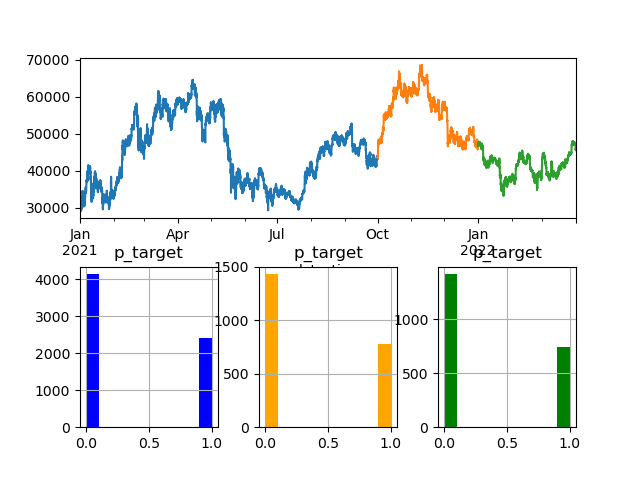

In [12]:
import numpy as np
df = df_labelled.drop(columns=['t', 't1']).copy()
# df= df.filter(regex="(1h)|(label)")

features = list(df.filter(regex="(MFI)|(ebb)|(tide)")) #|(MFI)|(EMA)|(tidex$)
labels = ['p_target'] 

df_train = df[train_window[0]:train_window[1]].copy()
df_train_full = df[train_window[0]:val_window[1]].copy()
df_val = df[val_window[0]:val_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TOTAL TRAIN window: {df_train_full.index[0]} ----> {df_train_full.index[-1]}, len: {len(df_train_full)}")
print(f"VAL window: {df_val.index[0]} ----> {df_val.index[-1]}, len: {len(df_val)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")
print(f"VAL/TRAIN: {len(df_val)/(len(df_val)+len(df_train))}")

print(f"\nlabels:\n{labels}\nfeatures: \n{features}")


%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplot_mosaic("AAA;BCD")
df_train["1h_close"].plot(ax=axs["A"])
df_val["1h_close"].plot(ax=axs["A"])
df_test["1h_close"].plot(ax=axs["A"])
df_train[labels].hist(ax=axs["B"], color="blue")
df_val[labels].hist(ax=axs["C"],color="orange")
df_test[labels].hist(ax=axs["D"],color="green")

In [22]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

train_features = df_train_full[features]
train_labels = df_train_full[labels]


test_features = df_test[features]
test_labels =  df_test[labels]

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)



x_train = scaled_train_features[train_window[0]:train_window[1]].values
x_val = scaled_train_features[val_window[0]:val_window[1]].values
x_test = scaled_test_features.values



y_train = train_labels[train_window[0]:train_window[1]].values
y_val = train_labels[val_window[0]:val_window[1]].values
y_test = test_labels.values

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val= x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_train[y_train == -1] = 0
y_val[y_val == -1] = 0
y_test[y_test == -1] = 0

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape} \nx_val_shape : {x_val.shape} , y_val_shape : {y_val.shape} \nx_test_shape : {x_test.shape} , y_test_shape : {y_test.shape}")
print(f"y labels: {np.unique(y_train)}")

x_train shape: (6552, 280, 1), y_train shape: (6552, 1) 
x_val_shape : (2208, 280, 1) , y_val_shape : (2208, 1) 
x_test_shape : (2160, 280, 1) , y_test_shape : (2160, 1)
y labels: [0 1]


## b) Build Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from config import LEARNING_RATE, DECAY, SEQ_LEN, INPUT_DIM

def build_model(loss, opt):
    model = Sequential()
    # model.add(Dense(64, activation='tanh', input_shape=(SEQ_LEN, INPUT_DIM)))
    # model.add(BatchNormalization())

    model.add(LSTM(256, input_shape=(SEQ_LEN, INPUT_DIM), return_sequences=True))
    model.add(Dropout(0.8))
    model.add(BatchNormalization())

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.8))
    model.add(BatchNormalization())

    model.add(LSTM(256))
    model.add(Dropout(0.8))
    model.add(BatchNormalization())

    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.1))

    model.add(Dense(2, activation='softmax'))

    model.compile(
        loss=loss,
        optimizer=opt,
        metrics=['accuracy']
    )
    return model

In [ ]:
def build_model(
    input_shape, # Number of features
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        
        
    outputs = layers.Dense(3, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [ ]:
# Let's make a list of CONSTANTS for modelling:
LAYERS = [8, 8, 8, 1]                # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 50                           # number of epochs
LR = 5e-2                            # learning rate of the gradient descent
LAMBD = 3e-2                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=0,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

# 4) Transformer

In [70]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

## a) Preprocessing

TOTAL window: 2019-09-06 18:00:00 ----> 2022-07-16 17:00:00, len: 25056
TRAIN window: 2020-04-01 00:00:00 ----> 2021-04-30 23:00:00, len: 9480
TOTAL TRAIN window: 2020-04-01 00:00:00 ----> 2021-12-31 23:00:00, len: 15360
VAL window: 2021-05-01 00:00:00 ----> 2021-12-31 23:00:00, len: 5880
TEST window: 2022-01-01 00:00:00 ----> 2022-03-31 23:00:00, len: 2160
VAL/TRAIN: 0.3828125

labels:
['p_target']
features: 
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '2h_ebb_slow', '2h_ebb_fast', '3h_ebb_slow', '3h_ebb_fast', '4h_ebb_slow', '4h_ebb_fast', '5h_ebb_slow', '5h_ebb_fast', '8h_ebb_slow', '8h_ebb_fast', '13h_ebb_slow', '13h_ebb_fast', '21h_ebb_slow', '21h_ebb_fast', '1h_MFI_8', '1h_MFI_13', '1h_MFI_21', '1h_MFI_34', '1h_MFI_55', '2h_MFI_8', '2h_M

array([<AxesSubplot:label='D', title={'center':'p_target'}>], dtype=object)

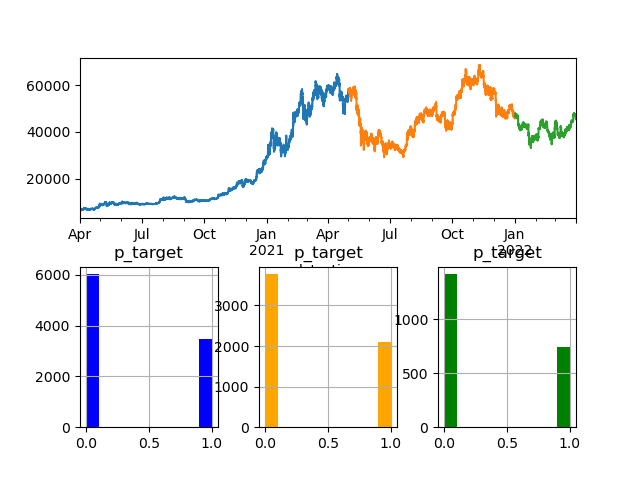

In [58]:
import numpy as np

train_window = ["2020-04-01",'2021-04-30']
val_window = ["2021-05-01",'2021-12-31']
test_window = ['2022-01-01','2022-03-31']

df = df_labelled.drop(columns=['t', 't1']).copy()
# df= df.filter(regex="(1h)|(label)")

features = list(df.filter(regex="(MFI)|(ebb)|(tide)")) #|(MFI)|(EMA)|(tidex$)
labels = ['p_target'] 

df_train = df[train_window[0]:train_window[1]].copy()
df_train_full = df[train_window[0]:val_window[1]].copy()
df_val = df[val_window[0]:val_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TOTAL TRAIN window: {df_train_full.index[0]} ----> {df_train_full.index[-1]}, len: {len(df_train_full)}")
print(f"VAL window: {df_val.index[0]} ----> {df_val.index[-1]}, len: {len(df_val)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")
print(f"VAL/TRAIN: {len(df_val)/(len(df_val)+len(df_train))}")

print(f"\nlabels:\n{labels}\nfeatures: \n{features}")


%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplot_mosaic("AAA;BCD")
df_train["1h_close"].plot(ax=axs["A"])
df_val["1h_close"].plot(ax=axs["A"])
df_test["1h_close"].plot(ax=axs["A"])
df_train[labels].hist(ax=axs["B"], color="blue")
df_val[labels].hist(ax=axs["C"],color="orange")
df_test[labels].hist(ax=axs["D"],color="green")

In [59]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

train_features = df_train_full[features]
train_labels = df_train_full[labels]


test_features = df_test[features]
test_labels =  df_test[labels]

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)



x_train = scaled_train_features[train_window[0]:train_window[1]].values
x_val = scaled_train_features[val_window[0]:val_window[1]].values
x_test = scaled_test_features.values



y_train = train_labels[train_window[0]:train_window[1]].values
y_val = train_labels[val_window[0]:val_window[1]].values
y_test = test_labels.values

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val= x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_train[y_train == -1] = 0
y_val[y_val == -1] = 0
y_test[y_test == -1] = 0

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape} \nx_val_shape : {x_val.shape} , y_val_shape : {y_val.shape} \nx_test_shape : {x_test.shape} , y_test_shape : {y_test.shape}")
print(f"y labels: {np.unique(y_train)}")

x_train shape: (9480, 280, 1), y_train shape: (9480, 1) 
x_val_shape : (5880, 280, 1) , y_val_shape : (5880, 1) 
x_test_shape : (2160, 280, 1) , y_test_shape : (2160, 1)
y labels: [0 1]


## b) Build network

In [69]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape, # Number of features
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        
        
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


# input_shape = x_train.shape[1:]

model = build_model(
                    input_shape=x_train.shape[1:],
                    head_size=256,
                    num_heads=4,
                    ff_dim=4,
                    num_transformer_blocks=4,
                    mlp_units=[128],
                    mlp_dropout=0.4,
                    dropout=0.25,
                    )

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 280, 1)]     0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 280, 1)      2           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 280, 1)      7169        ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                            

## c) Train network

Epoch 1/200
149/149 [==============================] - 44s 290ms/step - loss: 0.6448 - sparse_categorical_accuracy: 0.6377 - val_loss: 0.6566 - val_sparse_categorical_accuracy: 0.6082
Epoch 2/200
149/149 [==============================] - 39s 264ms/step - loss: 0.6416 - sparse_categorical_accuracy: 0.6407 - val_loss: 0.6535 - val_sparse_categorical_accuracy: 0.6231
Epoch 3/200
149/149 [==============================] - 40s 265ms/step - loss: 0.6398 - sparse_categorical_accuracy: 0.6390 - val_loss: 0.6548 - val_sparse_categorical_accuracy: 0.6206
Epoch 4/200
149/149 [==============================] - 39s 260ms/step - loss: 0.6342 - sparse_categorical_accuracy: 0.6470 - val_loss: 0.6547 - val_sparse_categorical_accuracy: 0.6276
Epoch 5/200
149/149 [==============================] - 38s 258ms/step - loss: 0.6352 - sparse_categorical_accuracy: 0.6458 - val_loss: 0.6576 - val_sparse_categorical_accuracy: 0.6060
Epoch 6/200
149/149 [==============================] - 39s 259ms/step - loss: 0.

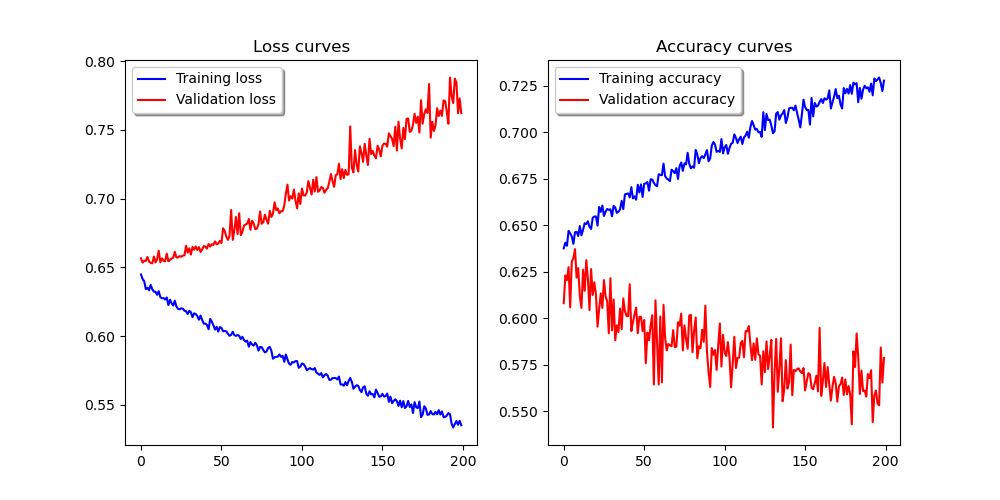

In [62]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

# history = model.fit(
#                     x_train,
#                     y_train,
#                     validation_split=0.252,
#                     epochs=20,
#                     batch_size=32, # Try for different batch sizes, past 64 hours good enough???
#                     callbacks=callbacks,
#                 )

history = model.fit(
                    x_train,
                    y_train,
                    batch_size=64,
                    epochs=200,
                    validation_data=(x_val, y_val),
                    )
#  EVALUATE

# Evaluate the model:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)


%matplotlib widget
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * x_test.shape[0])} out of {x_test.shape[0]} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].plot(history.history['loss'], color='b', label='Training loss')
axs[0].plot(history.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='Training accuracy')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [63]:
model.save('saved_model/full_cowl')

INFO:tensorflow:Assets written to: saved_model/full_cowl\assets


INFO:tensorflow:Assets written to: saved_model/full_cowl\assets


In [ ]:
from tensorflow import keras
new_model = keras.models.load_model('saved_model/full_cowl')
new_model.summary()

## d) Backtest

#### IST

297/297 [==============================] - 13s 43ms/step
                          L        S        A        B
Sharpe                 8.42     6.45    10.75     3.13
Total Return %        222.3   122.57   344.88    818.1
Equity Start $         1000     1000     2000     1000
Total Return $      2223.05  1225.71  3448.76  8159.16
Fees $                199.1   118.06   317.15      0.0
Equity End $        3223.05  2225.71  5448.76  9159.16
avg_wins             18.429   19.663    18.87    0.005
avg_loss               -6.6  -10.045   -8.323   -0.005
Profit Factor        23.453    9.135   14.813    1.113
total_trades            141       85      226        1
MDD %                  -4.8     -3.0     -4.8    -12.5
Win Rate %             89.4     82.4     86.7    100.0
Time in Trade Mean      8.0      7.1     41.9   9480.0
Time in Trade Max        59       34       59     9480
Time in Trade Min         2        2        2     9480

Backtesting 2020-04-01 00:00:00 to 2021-04-30 23:00:00 (9480 r

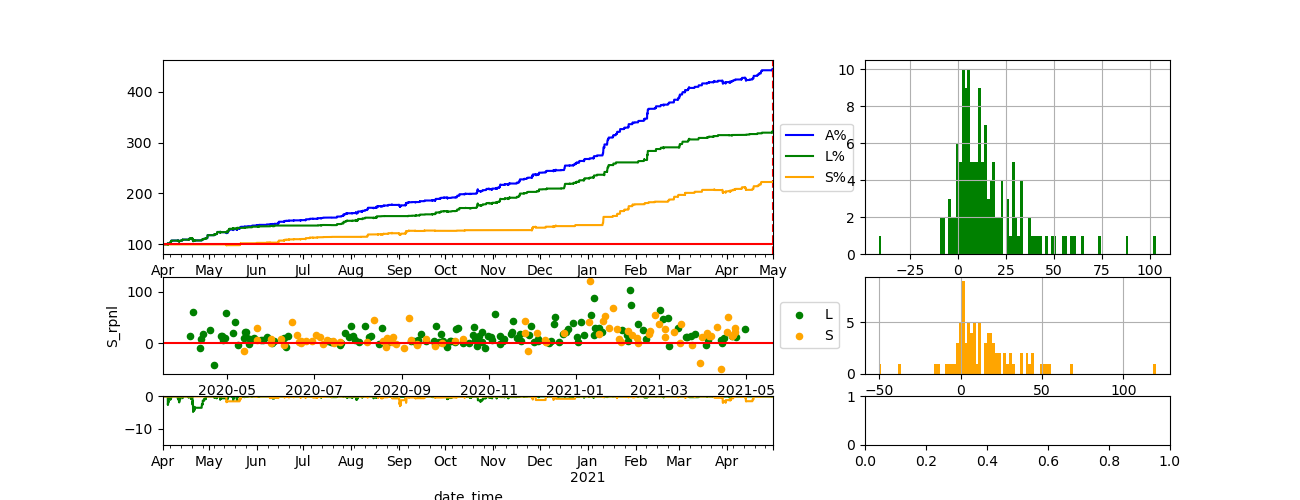

In [64]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget

p = model.predict(x_train, verbose=1)
df_train["p"] = p[:,1]

signals = ["signal","p"]

train_backtested,train_trades,train_summary = backtest.backtest(df_train, 
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          horizon_labels=[val_window[0]],
                                                          show_B=False)

#### OST

68/68 [==============================] - 3s 42ms/step
                          L       S        A       B
Sharpe                 0.16   -2.75    -2.36    0.17
Total Return %         0.33  -18.85   -18.52   -2.71
Equity Start $         1000    1000     2000    1000
Total Return $        41.03 -188.51  -147.48  -24.35
Fees $                33.65    46.3    79.95     0.0
Equity End $        1041.03  811.49  1852.52  975.65
avg_wins             11.018  13.508   12.263   0.005
avg_loss            -11.322 -19.875  -16.925  -0.005
Profit Factor         1.362   0.501      0.7   1.006
total_trades             24      33       57       1
MDD %                  -7.3   -26.2    -28.5   -34.6
Win Rate %             58.3    42.4     49.1   100.0
Time in Trade Mean      8.2     9.7     37.2  2160.0
Time in Trade Max        28      38       38    2160
Time in Trade Min         2       2        2    2160

Backtesting 2022-01-01 00:00:00 to 2022-03-31 23:00:00 (2160 rows)
Runtimes
backtesting: 0.692s
m

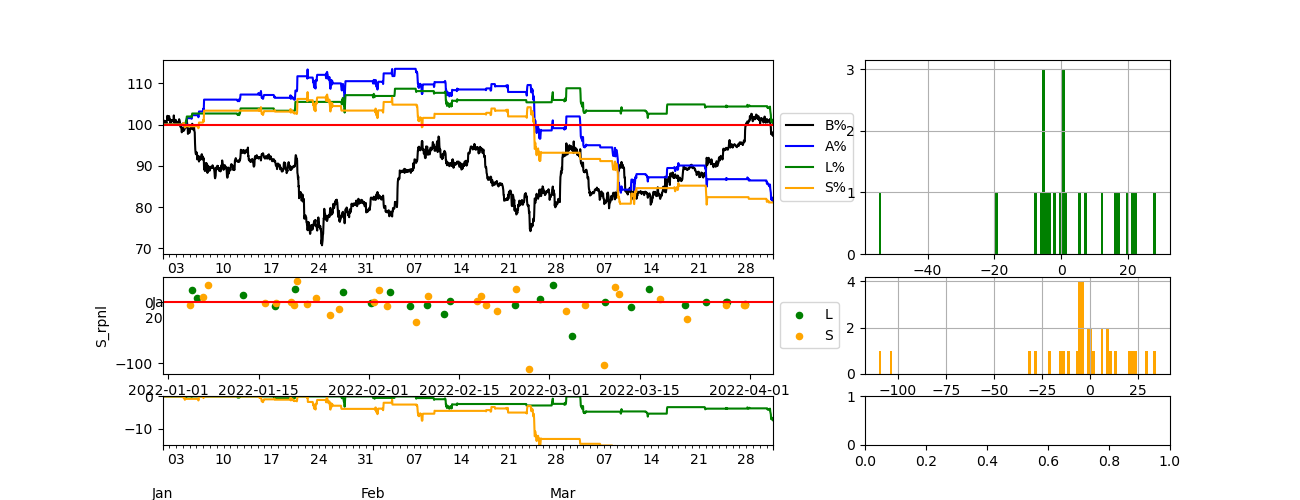

In [65]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget


p = model.predict(x_test, verbose=1)


# df_test["Y"] = ALL_y_pred
df_test["p"] = p[:,1]

signals = ["signal","p"]
test_backtested,test_trades,test_summary = backtest.backtest(df_test, signals=signals,signal_function = "meta")

## e) Trades Analysis

In [71]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)


ps = plotly_studies.build(cols_to_plot = ["cum_L_rpnl",
                                          "cum_S_rpnl",
                                          ["OHLC_1h",
                                           'L_entry_price',
                                           'L_exit_price',
                                           'S_entry_price',
                                           'S_exit_price',
                                           '1h_ebb_fast'],
                                          "p","p_target","signal","label",], row_heights = [1,1,4,1,1,1,1], height=1000,width=1000)
ps.plot(train_backtested["2021-01-01":"2021-03-01"])

plotting: cum_L_rpnl
plotting: cum_S_rpnl
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast'] --> LIST DETECTED
plotting: p
plotting: p_target
p_target -> cat data detected
plotting: signal
signal -> cat data detected
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> cum_L_rpnl <i style="color:…

In [ ]:
pred = model.predict(x_test, verbose=1)
df_OST = df_labelled [test_window[0]:test_window[1]].copy().dropna()
# df_OST["Y"] = pred
df_OST["Y"] = np.where(pred[:,1] >0.5,1,0) +  np.where(pred[:,0] >0.5,-1,0)
df_OST["p"] = pred[:,1]
df_OST.dropna()
%matplotlib widget
import importlib
from backtest import backtest
importlib.reload(backtest)
df_ost,trades_ost = backtest.backtest(df_OST, signals=["Y","p"])